In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns

import plotly
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go

import matplotlib.pyplot as plt

from natsort import index_natsorted

In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [ ]:
%matplotlib inline
pyo.init_notebook_mode(connected=True)

In [ ]:
df = pd.read_csv("./all_rgiout_2022-09-16", sep='\t')
df = df.sort_values(by=["Accession_Number"], ascending=True, key=lambda x: np.argsort(index_natsorted(df["Accession_Number"])), ignore_index=True)
df[['Species','Subspecies']] = df['Strain'].str.split('subsp.', 1, expand=True)
df = df.replace(np.nan, 'Null', regex=True)
df

In [6]:
#seqreport = pd.read_csv("./seqreports", sep="\t")
#seqreport['Accession_Number'] = seqreport['path'].str.split('/', 4, expand=True)[2]
#seqreport = seqreport[["Accession_Number", "Assembly_No", "replicon-type", "replicon-name","path"]]
#seqreport = seqreport.replace(np.nan, 'Null', regex=True)
#seqreport = seqreport.assign(Location=seqreport.agg('{0[replicon-type]} {0[replicon-name]}'.format, axis=1))
#seqreport = seqreport.drop_duplicates(subset=['Accession_Number','Assembly_No'], keep='last')
#seqreport = seqreport.sort_values(by=["Accession_Number"], ascending=True, key=lambda x: np.argsort(index_natsorted(seqreport["Accession_Number"])), ignore_index=True)
#seqreport

In [7]:
#df = df.merge(seqreport, how='left', on=['Accession_Number', 'Assembly_No'])
#df = df.replace(np.nan, 'Null', regex=True)
#df.shape

In [8]:
# this drops all but first line of every uq acc. number, useful for strain specific info
singleaccdf = df.drop_duplicates(subset=['Accession_Number'])
singleaccdf

,Accession_Number,Strain,Assembly_No,Year_Cultured,ORF_ID,Contig,Start,Stop,Orientation,Cut_Off,...,Predicted_DNA,Predicted_Protein,CARD_Protein_Sequence,Percentage Length of Reference Sequence,ID,Model_ID,Nudged,Note,Species,Subspecies
0,NCTC1,Shigella flexneri,1,1914,ENA|LM651928|LM651928.1_231 # 254564 # 255658 ...,ENA|LM651928|LM651928.1_231,254564.0,255658.0,+,Strict,...,ATGGAAAAACTGCGGGTAGGAATCGTTTTTGGTGGTAAATCAGCGG...,MEKLRVGIVFGGKSAEHEVSLQSAKNIVDAIDKSRFDVVLLGIDKQ...,MQNKKIAVIFGGNSTEYEVSLQSASAVFENINTNKFDIIPIGITRS...,104.3,gnl|BL_ORD_ID|1071|hsp_num:0,1157.0,Null,Null,Shigella flexneri,Null
42,NCTC2,Shigella flexneri,1,1920,UGYS01000001.1_242 # 250945 # 252318 # -1 # ID...,UGYS01000001.1_242,250945.0,252318.0,-,Perfect,...,ATGATAGGCAGCTTAACCGCGCGCATCTTCGCCATCTTCTGGCTGA...,MIGSLTARIFAIFWLTLALVLMLVLMLPKLDSRQMTELLDSEQRQG...,MIGSLTARIFAIFWLTLALVLMLVLMLPKLDSRQMTELLDSEQRQG...,100.0,gnl|BL_ORD_ID|131|hsp_num:0,152.0,Null,Null,Shigella flexneri,Null
86,NCTC5,Shigella flexneri,1,1919,UGYU01000001.1_273 # 260205 # 260570 # 1 # ID=...,UGYU01000001.1_273,260205.0,260570.0,+,Strict,...,ATGTATATTTATTGGATTTTATTAGGTCTGGCTATTGCTACAGAAA...,MYIYWILLGLAIATEITGTLSMKWASVSEGNGGFILMLVMISLSYI...,MFYWILLALAIIAEITGTLSMKWASVSGGHTGFILMLAMIALSYIF...,100.83,gnl|BL_ORD_ID|2727|hsp_num:0,3283.0,Null,Null,Shigella flexneri,Null
130,NCTC30,Vibrio cholerae non 0:1,1,1916,ENA|LS997867|LS997867.1_207 # 228777 # 229409 ...,ENA|LS997867|LS997867.1_207,228777.0,229409.0,-,Strict,...,ATGGTTCTAGGTAAACCTCAAACCGATCCAACACTAGAGTGGTTTC...,MVLGKPQTDPTLEWFLSHCHIHKYPSKSTLIHAGEKAETLYYIVKG...,MVLGKPQTDPTLEWFLSHCHIHKYPSKSKLIHQGEKAETLYYIVKG...,100.0,gnl|BL_ORD_ID|803|hsp_num:0,869.0,Null,Null,Vibrio cholerae non 0:1,Null
136,NCTC60,Proteus mirabilis,1,1935,UATP01000004.1_7 # 13565 # 15103 # -1 # ID=1_7...,UATP01000004.1_7,13565.0,15103.0,-,Strict,...,ATGATAAAGCGAGGTGTAAAGGTGATTAAAGAACCCTTACAAGGAG...,MIKRGVKVIKEPLQGGKLAIMTIALALATFMQVLDSTIANVAIPTI...,MQQQKPLEGAQLVIMTIALSLATFMQVLDSTIANVAIPTIAGNLGS...,100.0,gnl|BL_ORD_ID|2740|hsp_num:0,3299.0,Null,Null,Proteus mirabilis,Null
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31546,NCTC13923,Enterococcus faecium,1,2013,UARO01000068.1_42 # 41834 # 43171 # 1 # ID=1_4...,UARO01000068.1_42,41885.0,43171.0,+,Perfect,...,ATGGAAAATGAACAGTCGGTCGTTTTAACGAATTGGAAGAGAAATT...,MENEQSVVLTNWKRNYLFFLSGQFLSGITSMVVQYAIIWYLTRETG...,MENEQSVVLTNWKRNYLFFLSGQFLSGITSMVVQYAIIWYLTRETG...,103.97,gnl|BL_ORD_ID|2194|hsp_num:0,2426.0,True,"possible complete gene, reference contained wi...",Enterococcus faecium,Null
31565,NCTC13924,Staphylococcus epidermidis,1,2013,ENA|LR134536|LR134536.1_21 # 15520 # 17526 # -...,ENA|LR134536|LR134536.1_21,15520.0,17526.0,-,Strict,...,ATGAAAAAGATAAAAATTGTTCCACTTATTTTAATAGTTGTAGTTG...,MKKIKIVPLILIVVVVGFGIYFYASKDKEINNTIDAIEDKNFKQVY...,MKKIKIVPLILIVVVVGFGIYFYASKDKEINNTIDAIEDKNFKQVY...,100.0,gnl|BL_ORD_ID|1218|hsp_num:0,1321.0,Null,Null,Staphylococcus epidermidis,Null
31579,NCTC13936,Listeria booriae,1,2015,UGPF01000002.1_488 # 505194 # 506024 # -1 # ID...,UGPF01000002.1_488,505194.0,506024.0,-,Strict,...,ATGATGCATTTTATTTCATTCATGATTGCCCTTAGTTTGTCGGGGT...,MMHFISFMIALSLSGYHTAADYVQGDINPEAQTQTAANTEQTSGSS...,MEKSNYHSNVNHHKRHMKQSGEKRAFLWAFIISFTVCTLFLGWRLV...,102.99,gnl|BL_ORD_ID|602|hsp_num:0,556.0,Null,Null,Listeria booriae,Null
31585,NCTC13940,Listeria fleischmannii subsp. fleischmannii,1,2006,UAWT01000043.1_22 # 20996 # 22393 # 1 # ID=1_2...,UAWT01000043.1_22,20996.0,22393.0,+,Strict,...,ATGACAACTACTGCCTATAAAGGAACAAATAAACTTATTGTTGGGA...,MTTTAYKGTNKLIVGIVFGVITFWLFAQSMVNIVPDVQSDLGISSD...,MNETYRGGNKLILGIVLGVITFWLFAQSLVNVVPNLQQSFGADMGT...,100.65,gnl|BL_ORD_ID|4663|hsp_num:0,5726.0,Null,Null,Listeria fleischmannii,fleischmannii


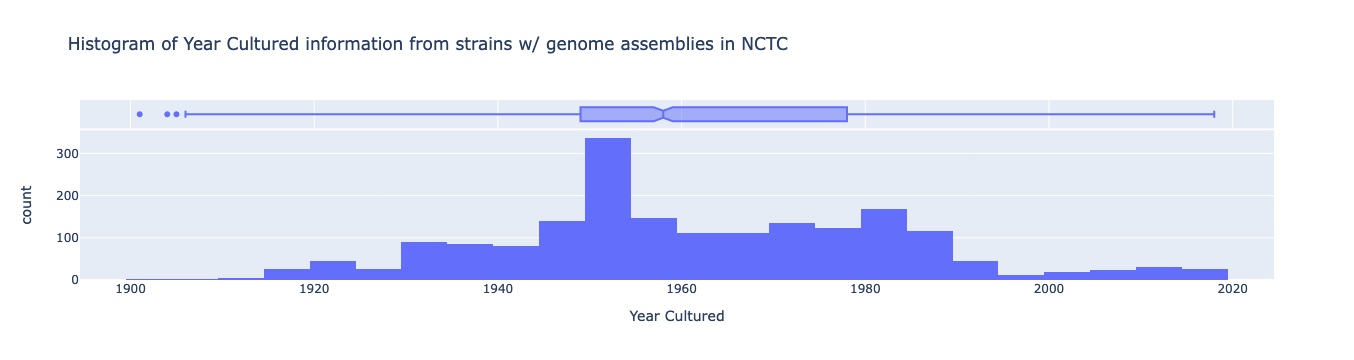

In [9]:
#sns.histplot(data=singleaccdf, x="Year_Cultured", bins=30).set(title="Histogram of Year Cultured information of assembled genomes in NCTC")
px.histogram(
    singleaccdf, 
    x="Year_Cultured", 
    labels={'Year_Cultured':'Year Cultured'}, 
    title="Histogram of Year Cultured information from strains w/ genome assemblies in NCTC",
    marginal='box'
    #nbins=30
)

In [10]:
print("%s assemblies analysed" % singleaccdf.shape[0])
print("%s assemblies before 1940" % singleaccdf.loc[singleaccdf['Year_Cultured'] < 1940].shape[0])
print("%s assemblies after 1940" % singleaccdf.loc[singleaccdf['Year_Cultured'] >= 1940].shape[0])

1906 assemblies analysed
280 assemblies before 1940
1626 assemblies after 1940


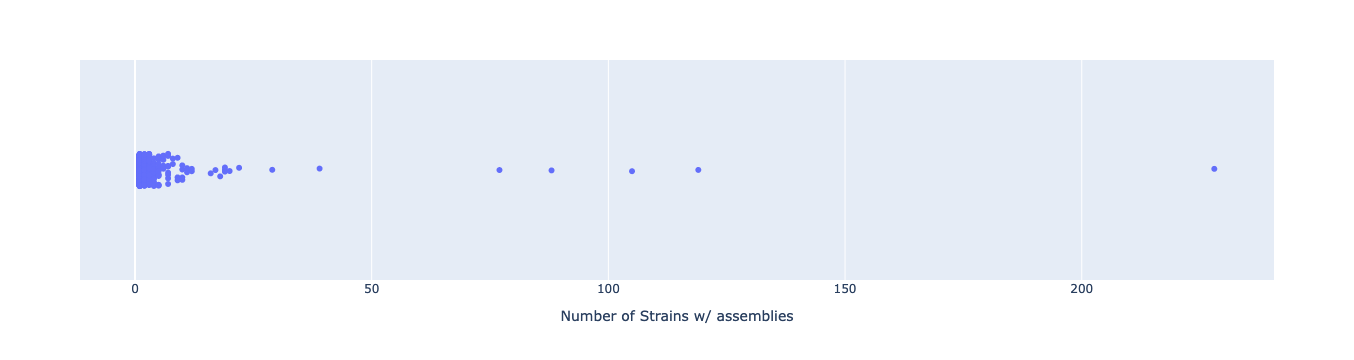

In [12]:
px.strip(
    singleaccdf.value_counts("Species").to_frame().reset_index(),
    x=0,
    hover_data=['Species'],
    labels={'0':'Number of Strains w/ assemblies'},
)

In [13]:
def plot_givenspecies(df, species):
    print("\nFound %s assemblies..." % df.loc[df['Species'].str.contains(species)].shape[0])
    x = px.histogram(
        df.loc[df['Species'].str.contains(species)], 
        x="Year_Cultured", 
        labels={'Year_Cultured':'Year Cultured'}, 
        title="Histogram of Year Cultured information from " + species,
        marginal="rug",
    )
    x.show()
    
interact(plot_givenspecies, 
         df=fixed(singleaccdf), 
         species=list(singleaccdf['Species'].value_counts().to_frame().index),
        );

interactive(children=(Dropdown(description='species', options=('Escherichia coli', 'Salmonella enterica ', 'St…

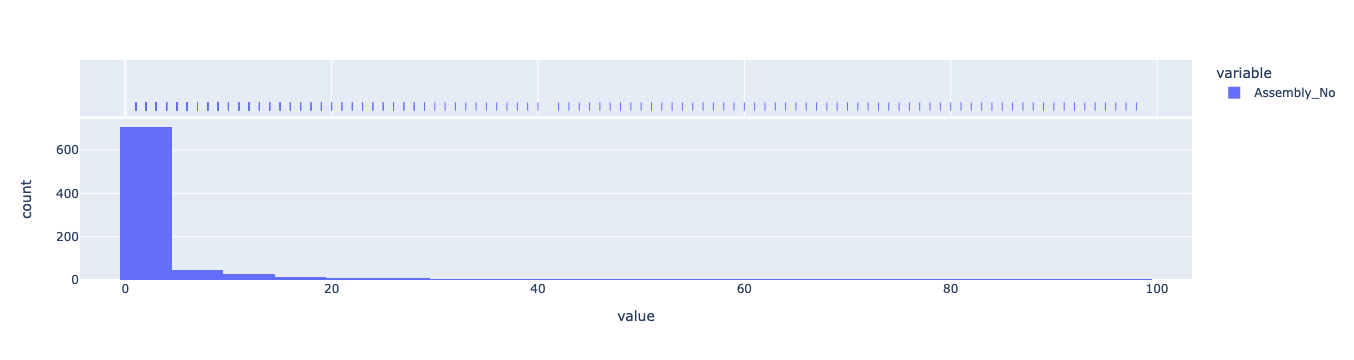

In [142]:
# histogram of assemblies? of assemblies
px.histogram(
    df.drop_duplicates(subset=['Accession_Number','Assembly_No'])['Assembly_No'],
    marginal="rug",
)

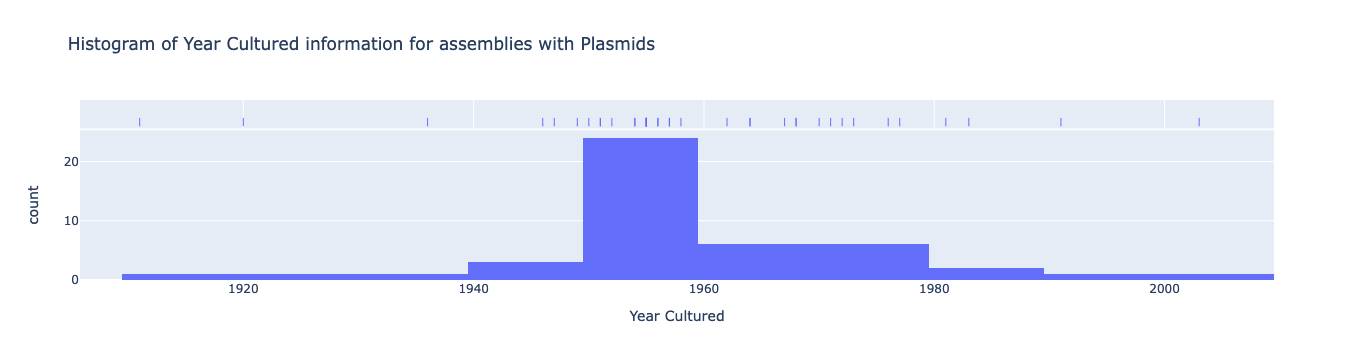

In [145]:
# histogram of years for bugs w/ plasmids
px.histogram(
    df.loc[df['Location'].str.contains("Plasmid")].drop_duplicates(subset=['Accession_Number']),
    x="Year_Cultured",
    labels={'Year_Cultured':'Year Cultured'}, 
    title="Histogram of Year Cultured information for assemblies with Plasmids",
    marginal="rug"
)

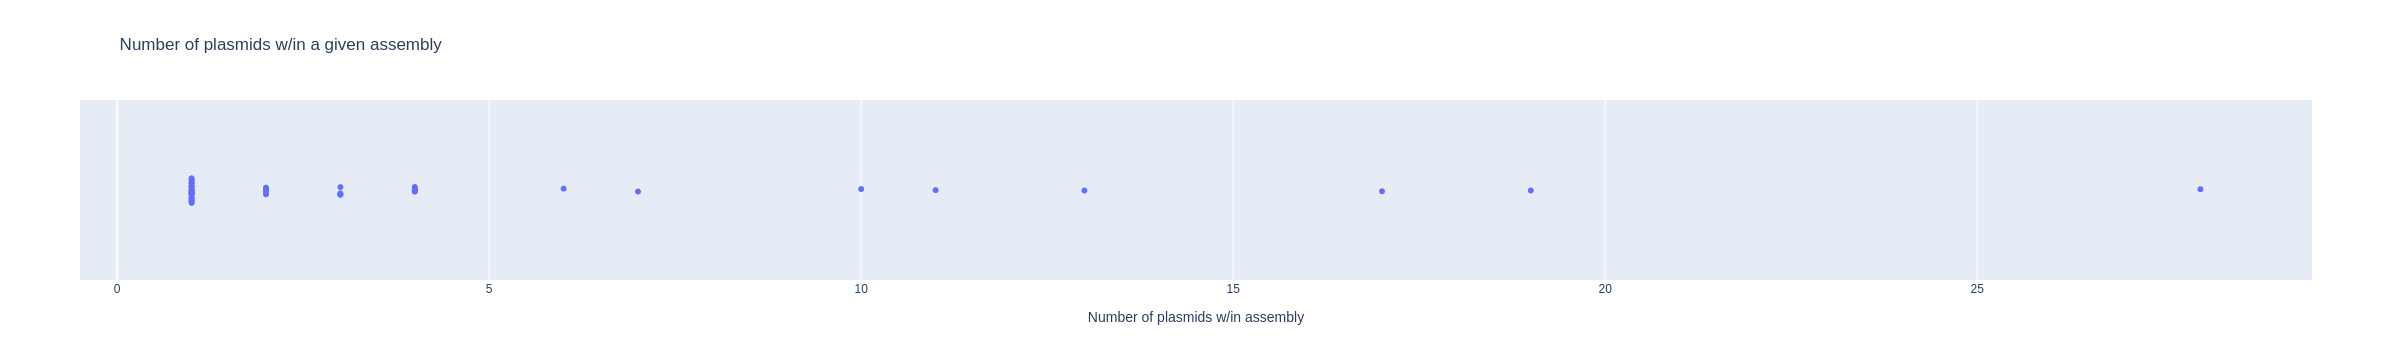

In [16]:
px.strip(
    df.loc[df['Location'].str.contains("Plasmid")].value_counts(subset=["Accession_Number","Species",'Year_Cultured']).to_frame().reset_index(),
    x=0,
    hover_data=['Accession_Number', 'Species', 'Year_Cultured'],
    labels={'0':'Number of plasmids w/in assembly'},
    title="Number of plasmids w/in a given assembly"
)

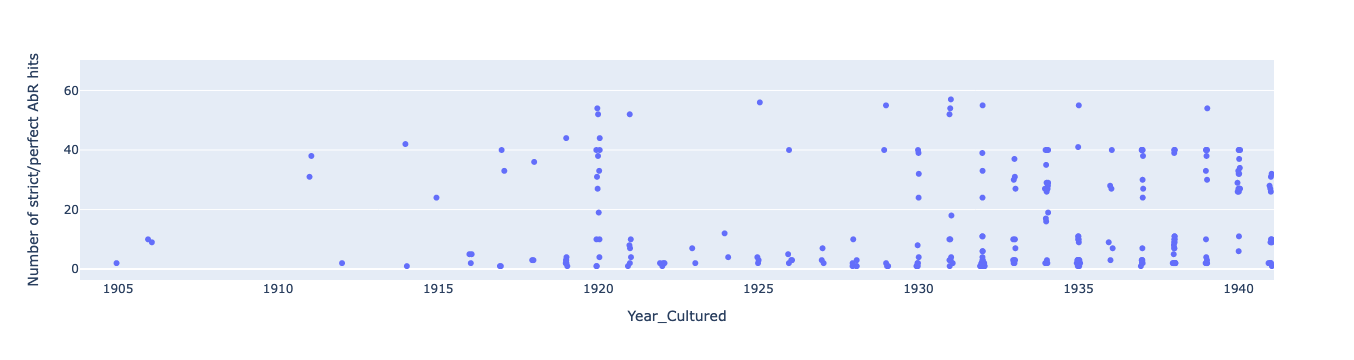

In [43]:
px.strip(
    df.loc[df['ORF_ID']!='NoAb'].value_counts(subset=["Accession_Number", "Year_Cultured", "Species"]).to_frame().reset_index(),
    x="Year_Cultured", 
    y=0, 
    hover_data=['Species','Accession_Number'],
    labels={'0':'Number of strict/perfect AbR hits'},
)

In [65]:
df.loc[df['Accession_Number']=='NCTC8468']

,Accession_Number,Strain,Assembly_No,Year_Cultured,ORF_ID,Contig,Start,Stop,Orientation,Cut_Off,...,ID,Model_ID,Nudged,Note,Species,Subspecies,replicon-type,replicon-name,path,Location
6573,NCTC8468,Haemophilus influenzae,1,1940,ENA|LR590465|LR590465.1_91 # 99763 # 101295 # ...,ENA|LR590465|LR590465.1_91,99763.0,101295.0,+,Strict,...,gnl|BL_ORD_ID|2802|hsp_num:0,3299.0,Null,Null,Haemophilus influenzae,Null,Chromosome,Null,NCTC/ena/NCTC8468/GCA_901472485/GCA_901472485....,Chromosome Null
6574,NCTC8468,Haemophilus influenzae,1,1940,ENA|LR590465|LR590465.1_175 # 171533 # 172303 ...,ENA|LR590465|LR590465.1_175,171533.0,172303.0,-,Strict,...,gnl|BL_ORD_ID|2853|hsp_num:0,3794.0,Null,Null,Haemophilus influenzae,Null,Chromosome,Null,NCTC/ena/NCTC8468/GCA_901472485/GCA_901472485....,Chromosome Null
6575,NCTC8468,Haemophilus influenzae,1,1940,ENA|LR590465|LR590465.1_1099 # 1188508 # 11899...,ENA|LR590465|LR590465.1_1099,1188508.0,1189902.0,+,Strict,...,gnl|BL_ORD_ID|2245|hsp_num:0,2425.0,Null,Null,Haemophilus influenzae,Null,Chromosome,Null,NCTC/ena/NCTC8468/GCA_901472485/GCA_901472485....,Chromosome Null
6576,NCTC8468,Haemophilus influenzae,1,1940,ENA|LR590465|LR590465.1_346 # 355817 # 357001 ...,ENA|LR590465|LR590465.1_346,355817.0,357001.0,-,Strict,...,gnl|BL_ORD_ID|2021|hsp_num:0,2158.0,Null,Null,Haemophilus influenzae,Null,Chromosome,Null,NCTC/ena/NCTC8468/GCA_901472485/GCA_901472485....,Chromosome Null
6577,NCTC8468,Haemophilus influenzae,1,1940,ENA|LR590465|LR590465.1_383 # 398480 # 399664 ...,ENA|LR590465|LR590465.1_383,398480.0,399664.0,+,Strict,...,gnl|BL_ORD_ID|2021|hsp_num:0,2158.0,Null,Null,Haemophilus influenzae,Null,Chromosome,Null,NCTC/ena/NCTC8468/GCA_901472485/GCA_901472485....,Chromosome Null
6578,NCTC8468,Haemophilus influenzae,1,1940,ENA|LR590465|LR590465.1_891 # 955388 # 957220 ...,ENA|LR590465|LR590465.1_891,955388.0,957220.0,+,Strict,...,gnl|BL_ORD_ID|2566|hsp_num:0,2886.0,Null,Null,Haemophilus influenzae,Null,Chromosome,Null,NCTC/ena/NCTC8468/GCA_901472485/GCA_901472485....,Chromosome Null


In [24]:
def measure_obs_abdistance(df, ab, year, bins=-1, verbose=True):
    if bins != -1:
        df['Bins'] = pd.cut(df['Year_Cultured'], bins)
    else:
        df['Bins'] = df['Year_Cultured']
    
    complete_dbdict = df.drop_duplicates(subset=['Accession_Number'])['Bins'].value_counts().to_dict()
    
    abmask = np.column_stack([df['Drug Class'].str.contains(ab, na=False) for col in df])
    ab_resistant = df.loc[abmask.any(axis=1)]
    abresist_dict = ab_resistant.drop_duplicates(subset=['Accession_Number'])['Bins'].value_counts().to_dict()

    year_dict = {}
    for years in complete_dbdict:
        if complete_dbdict[years] == 0:
            continue
        if years in abresist_dict:
            frac = abresist_dict[years]/complete_dbdict[years]
        else:
            frac = 0.0
        year_dict[years] = frac
    yeardf = pd.DataFrame.from_dict(year_dict, orient='index',columns=['frac']).reset_index().rename(columns={'index':'year'}).sort_values(by='year').reset_index(drop=True)
    if verbose:
        print(yeardf)
    anthro = {True:"Pre-Human Ab", False:"Post-Human Ab"}
    if bins != -1:
        line = pd.Index(yeardf['year']).get_loc(year)
        yeardf['row'] = np.arange(yeardf.shape[0])
        yeardf['Anthropogenicity'] = "Pre-Human Ab"
        yeardf.loc[yeardf['row'] > line, 'Anthropogenicity'] = "Post-Human Ab"
    else:
        yeardf['Anthropogenicity'] = 'Pre-Human Ab'
        yeardf.loc[yeardf['year'] > year, 'Anthropogenicity'] = "Post-Human Ab"
    
    preab_mean = yeardf.loc[yeardf['Anthropogenicity'] == "Pre-Human Ab"]['frac'].mean()
    postab_mean = yeardf.loc[yeardf['Anthropogenicity'] == "Post-Human Ab"]['frac'].mean()
    metric = postab_mean-preab_mean
    print("Pre-Ab mean fraction = %s" % (preab_mean))
    print("Post-Ab mean fraction = %s" % (postab_mean))
    print("metric = %s" % (metric))
    return yeardf, metric

In [25]:
def shuffleallyears(ogdf, ab, year, bins=-1, verbose=True, simulations=500):
    nulldists = []
    df = ogdf.copy()

    for simnum in range(simulations):
        shuffled = ogdf['Year_Cultured'].sample(frac=1).reset_index(drop=True)
        df['Year_Cultured'] = shuffled

        if bins != -1:
            df['Bins'] = pd.cut(df['Year_Cultured'], bins)
        else:
            df['Bins'] = df['Year_Cultured']

        complete_dbdict = df.drop_duplicates(subset=['Accession_Number'])['Bins'].value_counts().to_dict()

        abmask = np.column_stack([df['Drug Class'].str.contains(ab, na=False) for col in df])
        ab_resistant = df.loc[abmask.any(axis=1)]
        abresist_dict = ab_resistant.drop_duplicates(subset=['Accession_Number'])['Bins'].value_counts().to_dict()

        year_dict = {}
        for years in complete_dbdict:
            if complete_dbdict[years] == 0:
                continue
            if years in abresist_dict:
                frac = abresist_dict[years]/complete_dbdict[years]
            else:
                frac = 0.0
            year_dict[years] = frac
        yeardf = pd.DataFrame.from_dict(year_dict, orient='index',columns=['frac']).reset_index().rename(columns={'index':'year'}).sort_values(by='year').reset_index(drop=True)
        anthro = {True:"Pre-Human Ab", False:"Post-Human Ab"}
        if bins != -1:
            line = pd.Index(yeardf['year']).get_loc(year)
            yeardf['row'] = np.arange(yeardf.shape[0])
            yeardf['Anthropogenicity'] = "Pre-Human Ab"
            yeardf.loc[yeardf['row'] > line, 'Anthropogenicity'] = "Post-Human Ab"
        else:
            yeardf['Anthropogenicity'] = 'Pre-Human Ab'
            yeardf.loc[yeardf['year'] > year, 'Anthropogenicity'] = "Post-Human Ab"

        preab_mean = yeardf.loc[yeardf['Anthropogenicity'] == "Pre-Human Ab"]['frac'].mean()
        postab_mean = yeardf.loc[yeardf['Anthropogenicity'] == "Post-Human Ab"]['frac'].mean()
        metric = postab_mean-preab_mean
        nulldists.append(metric)
            
    return nulldists

In [26]:
import random
def shuffle_withinyears(ogdf, ab, year, bins=-1, verbose=True, simulations=500):
    nulldists = []
    cdf = ogdf.copy()

    for simnum in range(simulations):
        df = pd.DataFrame(columns = ogdf.columns)
        allyears = cdf['Year_Cultured'].unique()
        for years in allyears:
            random_year = random.choice(allyears)
            x = cdf.loc[cdf['Year_Cultured']==years].copy()
            x['Year_Cultured'] = random_year
            df = pd.concat([df, x])
        
        if bins != -1:
            df['Bins'] = pd.cut(df['Year_Cultured'], bins)
        else:
            df['Bins'] = df['Year_Cultured']

        complete_dbdict = df.drop_duplicates(subset=['Accession_Number'])['Bins'].value_counts().to_dict()

        abmask = np.column_stack([df['Drug Class'].str.contains(ab, na=False) for col in df])
        ab_resistant = df.loc[abmask.any(axis=1)]
        abresist_dict = ab_resistant.drop_duplicates(subset=['Accession_Number'])['Bins'].value_counts().to_dict()

        year_dict = {}
        for years in complete_dbdict:
            if complete_dbdict[years] == 0:
                continue
            if years in abresist_dict:
                frac = abresist_dict[years]/complete_dbdict[years]
            else:
                frac = 0.0
            year_dict[years] = frac
        yeardf = pd.DataFrame.from_dict(year_dict, orient='index',columns=['frac']).reset_index().rename(columns={'index':'year'}).sort_values(by='year').reset_index(drop=True)
        anthro = {True:"Pre-Human Ab", False:"Post-Human Ab"}
        if bins != -1:
            line = pd.Index(yeardf['year']).get_loc(year)
            yeardf['row'] = np.arange(yeardf.shape[0])
            yeardf['Anthropogenicity'] = "Pre-Human Ab"
            yeardf.loc[yeardf['row'] > line, 'Anthropogenicity'] = "Post-Human Ab"
        else:
            yeardf['Anthropogenicity'] = 'Pre-Human Ab'
            yeardf.loc[yeardf['year'] > year, 'Anthropogenicity'] = "Post-Human Ab"

        preab_mean = yeardf.loc[yeardf['Anthropogenicity'] == "Pre-Human Ab"]['frac'].mean()
        postab_mean = yeardf.loc[yeardf['Anthropogenicity'] == "Post-Human Ab"]['frac'].mean()
        metric = postab_mean-preab_mean
        nulldists.append(metric)
            
    return nulldists

In [27]:
drugs = {}
for x in list(df['Drug Class']):
    classes = x.split('; ')
    for c in classes:
        if c in drugs:
            drugs[c] += 1
        else:
            drugs[c] = 1
drugs = sorted(drugs, key=drugs.get, reverse=True)

In [28]:
def plot_abresist_drugtype(df, ab, year, bins=-1, verbose=True, sims=100,figname="doodoo",savefig=False, smooth=5):
    frac_df, abdist_obs = measure_obs_abdistance(df, ab, year, bins=bins, verbose=verbose)

    # histogram of fraction of strains w/ RGI hits for drug class
    plt.figure(figsize=(14,8))
    sns.barplot(data=frac_df, x='year',y='frac', color='salmon', saturation=0.5)
    if bins != -1:
        plt.axvline(pd.Index(frac_df['year']).get_loc(year))
    else:
        plt.axvline(pd.Index(frac_df['year']).get_loc(year, method='nearest'))
    plt.ylabel("Fraction of bugs with resistance")
    #plt.yticks(rotation=90)
    plt.xlabel("Year")
    plt.xticks(rotation=45)
    if savefig:
        plt.savefig("fractionofresist_{}.png".format(figname), bbox_inches='tight',dpi=100)
    plt.show()
    
    d = {'Year': [], 'frac': [], 'Anthropogenicity': []}
    for years in range(frac_df['year'].min(), frac_df['year'].max()):
        upb = smooth + years
        downb = years-smooth
        g = frac_df.loc[(frac_df['year'] <= upb) & (downb <= frac_df['year'])]
        d['Year'].append(years)
        if years >= year:
            d['Anthropogenicity'].append("Post-Human Ab")
        else:
            d['Anthropogenicity'].append("Pre-Human Ab")
        d['frac'].append(g['frac'].mean())
    xdf = pd.DataFrame(data=d)
    lp = sns.lineplot(data=xdf, x='Year', y='frac', markers=True, hue='Anthropogenicity')
    lp.set(ylim=(0, 1))
    dp = sns.scatterplot(data=xdf, x="Year", y='frac', hue='Anthropogenicity', legend=False)
    plt.ylabel("Fraction of bugs with resistance")
    plt.xlabel("Year cultured with range of {} years".format(smooth))
    plt.xticks(rotation=45)
    plt.axvline(year, color='red')
    preab_df=xdf.loc[xdf['Anthropogenicity']=='Pre-Human Ab']
    lp.hlines(y=preab_df['frac'].mean(), xmin=preab_df['Year'].min(), xmax=preab_df['Year'].max())
    
    postab_df=xdf.loc[xdf['Anthropogenicity']=='Post-Human Ab']
    lp.hlines(y=postab_df['frac'].mean(), xmin=postab_df['Year'].min(), xmax=postab_df['Year'].max())
    if savefig:
        plt.savefig("fractionofresist_{}.png".format(figname), bbox_inches='tight',dpi=100)
    plt.show()
    
    preab_mean = frac_df.loc[frac_df['Anthropogenicity'] == "Pre-Human Ab"]['frac'].mean()
    postab_mean = frac_df.loc[frac_df['Anthropogenicity'] == "Post-Human Ab"]['frac'].mean()
    
    #plt.figure()
    #fig,ax = plt.subplots()
    #ax.barh(frac_df['year'], frac_df['frac'], align='center')
    #ax.invert_yaxis()
    #plt.show()
    
    #kde dist. of preab vs. postab  
    #plt.figure(figsize=(14,8))
    #sns.kdeplot(data=frac_df,x='frac', hue='Anthropogenicity', cut=0)
    #preab_mean = frac_df.loc[frac_df['Anthropogenicity'] == "Pre-Human Ab"]['frac'].mean()
    #postab_mean = frac_df.loc[frac_df['Anthropogenicity'] == "Post-Human Ab"]['frac'].mean()
    #plt.axvline(preab_mean, label="Pre-Ab mean = {:.2f}".format(preab_mean))
    #plt.axvline(postab_mean, color="#FF973C", label="Post-Ab mean = {:.2f}".format(postab_mean))
    #plt.legend()
    #plt.xlabel("Fraction of bugs with resistance")
    #if savefig:
    #    plt.savefig("kdedist_{}.png".format(figname))
    #plt.show()
    
    
    nulldist = shuffleallyears(df, ab, year, bins=-1, verbose=True, simulations=sims)
    #plt.figure(figsize=(14,8))
    sns.histplot(nulldist)
    plt.axvline(abdist_obs, color='red', label="Ab-dist observed = {:.3f}".format(abdist_obs))
    plt.legend()
    plt.title("All Years Shuffled")
    plt.xlabel("Antibiotic distances observed in {} simulations".format(sims))
    if savefig:
        plt.savefig("allyearsshuffled_{}.png".format(figname))
    plt.show()
    
    nulldist = shuffle_withinyears(df, ab, year, bins=-1, verbose=True, simulations=sims)
    #plt.figure(figsize=(14,8))
    sns.histplot(nulldist)
    plt.axvline(abdist_obs, color='red', label="Ab-dist observed = {:.3f}".format(abdist_obs))
    plt.title("Within Year Shuffling")
    plt.xlabel("Antibiotic distances observed in {} simulations".format(sims))
    if savefig:
        plt.savefig("withinyearsshuffled_{}.png".format(figname))
    plt.show()
    #plt.figure(figsize=(14,8))
    #sns.displot(data=frac_df, x="year", y="frac", kind='kde')
    #plt.show()


In [1]:
interact_manual(plot_abresist_drugtype, 
                df=fixed(df), 
                ab=drugs, 
                year=widgets.IntSlider(min=1900, max=2010, step=1, value=1940), 
                bins=widgets.IntSlider(min=-1,max=30, step=1, value=-1),
                sims=widgets.IntSlider(min=0,max=1000,step=10,value=10),
                verbose=False);

NameError: name 'interact_manual' is not defined